In [65]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from random import randrange

In [66]:
# Readig Data
data = pd.read_csv("C:\\Benion\\Benion Programmings\\Python\\AI & ML\\data\\tree-diameter-height.csv")
data.shape

(450, 3)

In [67]:
data.head(10)

,S/N,Height,Diameter
0,1,16.199683,43.514815
1,2,20.832644,9.981329
2,3,0.488141,10.561674
3,4,22.710793,3.966893
4,5,7.883484,39.131736
5,6,10.585037,8.313417
6,7,3.997367,6.735644
7,8,20.572101,45.635678
8,9,4.568331,6.560634
9,10,22.774925,9.151818


In [68]:
# Declaring Dependent and Independent Variables
X = data["Height"].values.reshape(-1, 1)
y = data["Diameter"].values.reshape(-1, 1)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Implement the Support Vector Machine --> Support Vector Regressor and fit the data
model = SVR(kernel="rbf")
model.fit(X_train, y_train)

# Make Prediction
predictions = model.predict(X_test)

C:\Users\benion\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
data_frame = pd.DataFrame({"Actual(x)": X_test.flatten(), "Actual(y)": y_test.flatten(), "Predicted(y)": predictions.flatten()})
data_frame

,Actual(x),Actual(y),Predicted(y)
0,17.686604,2.723447,24.478231
1,15.830319,7.897541,24.472855
2,15.796743,18.023670,24.469457
3,17.549619,21.813627,24.487138
4,2.194713,27.055545,21.032140
...,...,...,...
85,12.594174,20.803021,23.453356
86,22.923487,34.320501,24.141997
87,0.159893,20.314663,20.944784
88,6.852907,19.856327,21.260516


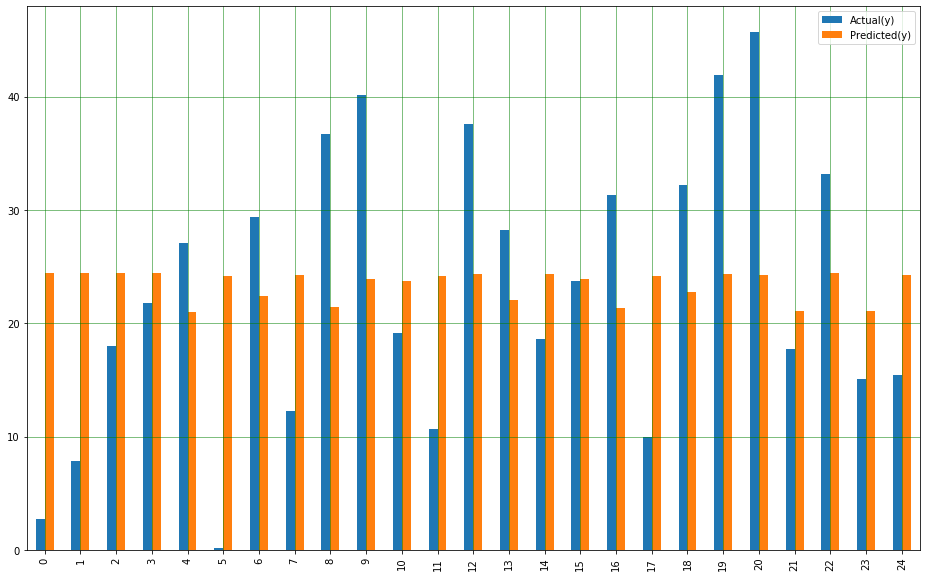

In [70]:
# Bar Graph
data_frame = pd.DataFrame({"Actual(y)": y_test.flatten(), "Predicted(y)": predictions.flatten()})
data_frame_graph = data_frame.head(25)
data_frame_graph.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

In [71]:
# Errors
mean_absolute_error = mean_absolute_error(y_test, predictions)
mean_squared_error = mean_squared_error(y_test, predictions)
root_mean_squared_error = np.sqrt(mean_squared_error)
r2_score = model.score(X_train, y_train)
print(f"Mean Absolute Error: {mean_absolute_error}")
print(f"Mean Squared Error: {mean_squared_error}")
print(f"Root Mean Squared Error: {root_mean_squared_error}")
print(f"r^2 Score: {r2_score} -- ({r2_score * 100})%")

Mean Absolute Error: 10.844812438429763
Mean Squared Error: 159.90534309448847
Root Mean Squared Error: 12.645368444394512
r^2 Score: 0.0007705955945490617 -- (0.07705955945490617)%


In [72]:
# Make Predictions Manually
regressor_model = SVR(kernel="rbf")
regressor_model.fit(X, y)
X_predict = [[14.543234]]
y_predict = regressor_model.predict(X_predict)
predicted_value = y_predict[0]
print(f"Predicted Diameter(y): {predicted_value}")

Predicted Diameter(y): 23.278166928519813


C:\Users\benion\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
